<h1 style="text-align: center;" markdown="1">Pràctica 2</h1>

<p style="text-align: center;" markdown="1">Ramon Maria Gallart Escolà</p>
<p style="text-align: center;" markdown="1">Màster en Ciència de Dades</p>
<p style="text-align: center;" markdown="1">Tipologia i Cicle de Vida de les Dades</p>
<p style="text-align: center;" markdown="1">5 Juny 2018</p>

## 1. Enllaç al dataset
El conjunt de dades està extret de Kaggle en aquest enllaç: [https://www.kaggle.com/fernandol/countries-of-the-world](https://www.kaggle.com/fernandol/countries-of-the-world)
### 1.1. Descripció del dataset
El conjunt de dades està compost de 20 columnes (camps) i 228 files (registres). Aquestes dades representen diferents característiques dels països que hi ha al món. Les dades provenen del gobern dels Estats Units, és per això que utilitza mesures imperials. Aquestes característiques són les següents:

- **Country**: nom del país
- **Region**: lloc en què se situa dintre del món
- **Population**: quantitat de població
- **Area (sq. mi.)**: milles quadrades que ocupa
- **Pop. Density (per sq.mi.)**: densitat de població per milla quadrada
- **Coastline (coast/area ratio)**: percentatge de costa que té el país
- **Net migration**: migració neta (si és positiva, la gent ve al país, si és negativa, la gent en marxa)
- **Infant Mortality (per 1000 births)**: quantitat de nens que moren al néixer per cada 1000
- **GDP ($ per capita)**: renda per càpita
- **Literacy (%)**: percentatge de gent que sap llegir i escriure
- **Phones (per 1000)**: quantitat de telèfons per cada 1000 habitants
- **Arable (%)**: percentatge del terreny total que és cultivable
- **Crops (%)**: percentatge del terreny que realment s'extreu collita
- **Other (%)**: percentatge del terreny que s'utilitza a altres coses
- **Climate**: classificació del clima
- **Birthrate**: percentatge de natalitat
- **Deathrate**: percentatge de mortalitat
- **Agriculture**: quantitat de població activa que es dedica a l'agricultura
- **Industry**: quantitat de població activa que es dedica a la indústria
- **Service**: quantitat de població activa que es dedica als serveis

Aquests tres darrers camps estan força mal informats en general. En alguns casos simplement la dada no hi consta. En d'altres es dona una quantitat que sembla absoluta i en d'altres una quantitat que es dóna en tant per 1.

## 2. Importància i objectius de les anàlisis

Amb aquest conjunt de dades em plantejo la pregunta de quines són les variables que influeixen més en el GDP (producte interior brut) de cada país.

Aquestes anàlisis podrien ser interessants a l'hora d'aplicar polítiques socials i econòmiques que afavoreixin el desenvolupament de la població.

### 2.1. Neteja de les dades

En aquest punt llegim les dades del fitxer CSV. Per a fer això ens ajudarà la biblioteca Python `pandas`.

Abans de llegir el fitxer, però, una inspecció visual mostra que usa `','` en comptes de `'.'` per separar els decimals. Per corregir aquesta situació he obert el meu editor de text (Atom) i amb aquesta expressió regular he substituit les `','` per `'.'`.

    Pattern: "(-[0-9]+|[0-9]+),([0-9]+)"
    Substitution: "$1.$2"

El fitxer associat a la pràctica té aquesta correcció feta (`countries of the world.csv`).

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import preprocessing
import scipy

In [2]:
data = pd.read_csv('countries of the world.csv')

In [3]:
data.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


Podem veure com la biblioteca `pandas` de Python ha realitzat algunes operacions per nosaltres en carregar el fitxer CSV. Primer de tot ha inferit que la primera fila és la capçalera. Després ha entés que a partir de la tercera columna els valors són numèrics. Ha convertit els valors buits en `NaN` per que puguin ser identificats i tractats de forma més senzilla.

Finalment, ha realitzat una operació de conversió en les darreres tres columnes. Els valors `Agriculture`, `Industry` i `Service` són molt heterogenis en el document original. Com he comentat abans, alguns valors són buits, d'altres estan en valor absolut, uns altres en tant per 1 i, per acabar d'arrodonir, alguns són una barreja dels dos. `pandas` ha organitzat automàticament aquests valors, adonant-se que té sentit tractar-los de forma conjunta i allà on ha pogut, els ha transformat en el format de valor que tenia més sentit, en aquest cas tant per 1.

Per continuar no necessitem les columnes `'Country'`, `'Region'` ni `'Climate'`, pel que ens en desfem.

In [4]:
data = data.drop(['Country', 'Region', 'Climate'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 17 columns):
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Birthrate                             224 non-null float64
Deathrate                             223 non-null float64
Agriculture                           212 non-null float64
Industry      

Amb aquesta informació podem veure que el dataset compta amb 227 files. També veiem que gairebé a totes les columnes hi manquen dades. Vull utilitzar dades de tots els països per als quals tinc dades. És per aquest motiu que decideixo prescindir dels països dels quals em manca alguna dada.

In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 226
Data columns (total 17 columns):
Population                            194 non-null int64
Area (sq. mi.)                        194 non-null int64
Pop. Density (per sq. mi.)            194 non-null float64
Coastline (coast/area ratio)          194 non-null float64
Net migration                         194 non-null float64
Infant mortality (per 1000 births)    194 non-null float64
GDP ($ per capita)                    194 non-null float64
Literacy (%)                          194 non-null float64
Phones (per 1000)                     194 non-null float64
Arable (%)                            194 non-null float64
Crops (%)                             194 non-null float64
Other (%)                             194 non-null float64
Birthrate                             194 non-null float64
Deathrate                             194 non-null float64
Agriculture                           194 non-null float64
Industry      

Això em deixa amb un total de 194 països per analitzar en comptes dels 227 originals, un 85% del total de la mostra.

In [8]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,1.940000e+02,1.940000e+02,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.347818e+07,6.860004e+05,285.991237,15.635670,-0.093763,38.678351,9451.546392,82.164948,212.639691,14.426031,4.339485,81.234072,22.703711,9.557732,0.154175,0.289763,0.555552
std,1.269602e+08,1.917360e+06,1327.760940,71.236857,4.642243,36.622435,10142.514158,19.895869,209.254387,13.409425,7.870315,16.268580,11.359592,5.194357,0.149938,0.139616,0.164883
min,1.347700e+04,2.800000e+01,1.800000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.410000,0.000000,0.032000,0.062000
25%,1.349476e+06,2.039725e+04,26.750000,0.092500,-1.032500,8.987500,1825.000000,70.100000,28.250000,3.805000,0.232500,71.357500,13.347500,5.880000,0.038000,0.200000,0.425250
50%,6.881405e+06,1.195100e+05,69.800000,0.540000,0.000000,24.245000,5400.000000,90.950000,140.350000,10.690000,1.055000,85.540000,19.320000,8.215000,0.099500,0.275000,0.560000
75%,2.238307e+07,5.116955e+05,177.750000,4.897500,0.675000,62.575000,13700.000000,97.975000,339.600000,21.057500,4.520000,94.550000,30.865000,11.715000,0.229250,0.351500,0.670750
max,1.313974e+09,1.707520e+07,16183.000000,870.660000,23.060000,191.190000,55100.000000,100.000000,898.000000,62.110000,48.960000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


### 2.2. Valors extrems

Veiem quin són els valors extrems per les dades amb les que treballarem. Aquesta informació ens la pot proporcionar la funció `boxplot`.

Population


<IPython.core.display.Javascript object>


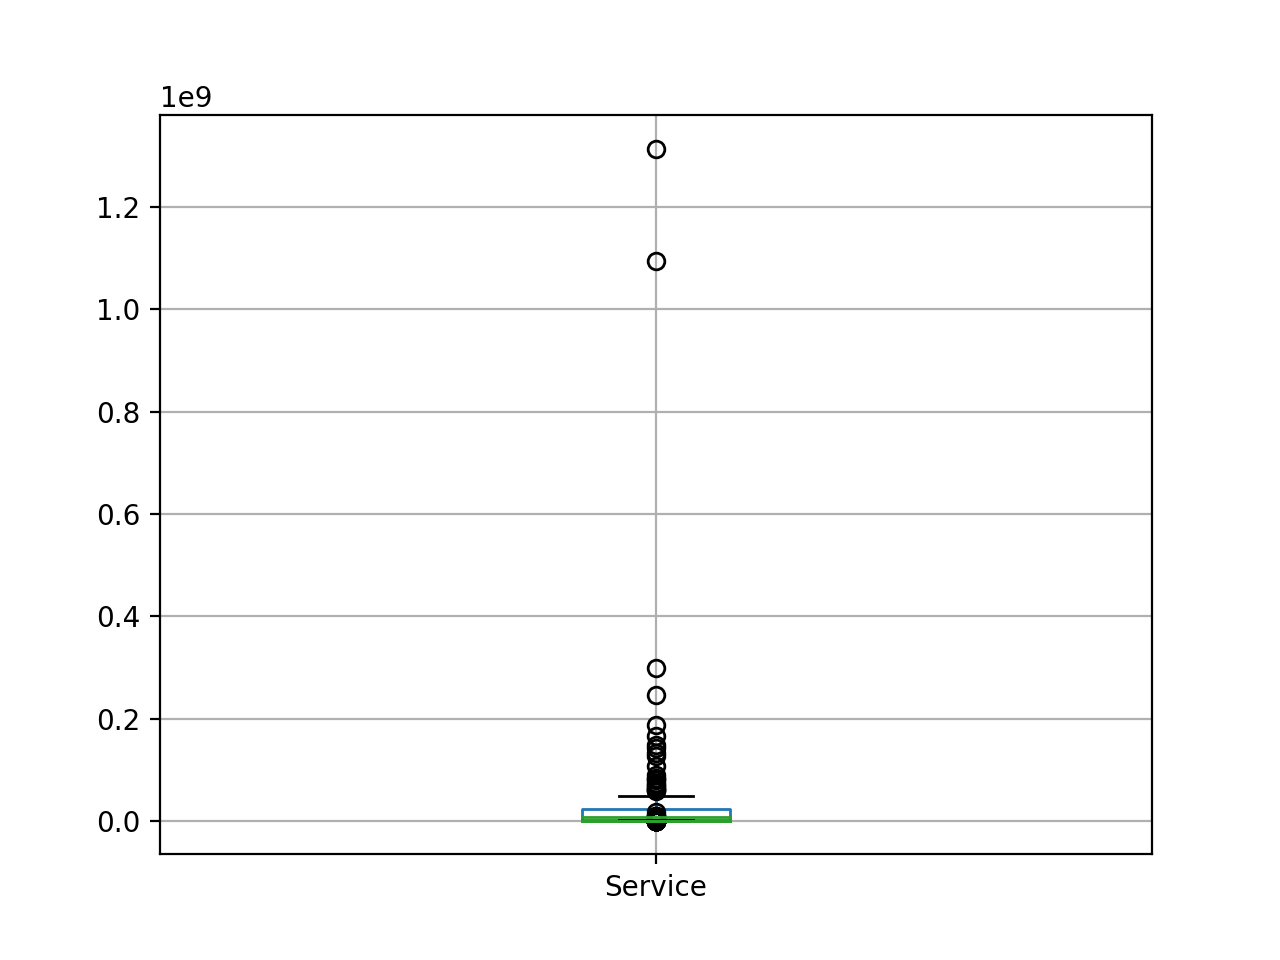

	 [array([ 147365352,  188078227, 1313973713,   62660551,   78887007,
         74777981,   60876136,   82422299, 1095351995,  245452739,
         68688433,   58133509,  127463611,  107449525,  131859731,
        165803560,   89468677,  142893540,   64631595,   70413958,
         60609153,  298444215,   84402966])]
Area (sq. mi.)
	 [array([ 2381740,  2766890,  7686850,  8511965,  9984670,  1284000,
        9596960,  2345410,  3287590,  1919440,  1648000,  2717300,
        1759540,  1972550,  1564116,  1267000,  1285220, 17075200,
        1960582,  2505810,  9631420])]
Pop. Density (per sq. mi.)
	 [array([ 1050.5,  1023.4,   649.5,  1241. ,  6355.7,   496. , 16183. ,
        1196.7,  1266.5,   608.3,  6482.2,   640.3])]
Coastline (coast/area ratio)
	 [array([ 59.8 ,  34.54,  35.49,  25.41,  24.21,  22.51, 194.34,  52.29,
        23.93,  61.07,  15.67,  16.97,  19.63,  60.6 ,  35.17,  17.19,
        67.12, 146.43, 214.67,  62.28,  31.82, 870.66,  37.92, 331.66,
        51.72,  25.65,  21.

In [9]:
for name, values in data.iteritems():
    print('{name}'.format(name=name))
    _, bp = pd.DataFrame.boxplot(data[[name]], return_type='both')
    outliers = [flier.get_ydata() for flier in bp['fliers']]
    print('\t', outliers)

Tot i que totes les columnes tenen valors extrems, aquesta és una circumstància que haurem de deixar tal i com està. Això és així ja que aquestes dades són les que provenen directament de les dades que tenim per als països que estem tractant.

## 3. Anàlisi de les dades

### 3.1. Selecció de les dades que es volen analitzar.

En aquest apartat seleccionem les dades que volem analitzar i comparar. Vull comparar el GDP amb la densitat de població i els percentatges de la població que es dedica al primer, segon o tercer sector i el nombre de mòbils. D'aquesta manera intentaré buscar una relació causa-efecte entre aquestes dades.

In [10]:
gdp = data[['GDP ($ per capita)']]
dens = data[['Pop. Density (per sq. mi.)']]
agr = data[['Agriculture']]
ind = data[['Industry']]
ser = data[['Service']]
phon = data[['Phones (per 1000)']]

dades = {'gdp': gdp, 'dens': dens, 'agr': agr, 'ind': ind, 'ser': ser, 'phon': phon}

### 3.2. Comprobació de la normalitat de les dades.

A continuació procedim a comprobar si les dades amb les que comptem segueixen una distribució normal. Per fer la comprovació utitlitzarem el test de Shapiro. Si en aquest test obtenim un p-valor igual o superior a 0,05 això significaria que les dades segueixen una distribució normal.

In [11]:
for k, d in dades.items():
    print(k)
    shapiro_results = scipy.stats.shapiro(d)
    print('Shapiro: Test Statistic = {}, p-value = {}'.format(shapiro_results[0], shapiro_results[1]))

gdp
Shapiro: Test Statistic = 0.8035697937011719, p-value = 6.865622589354416e-15
dens
Shapiro: Test Statistic = 0.1647547483444214, p-value = 1.4638453043196736e-28
agr
Shapiro: Test Statistic = 0.8538418412208557, p-value = 1.111641811588071e-12
ind
Shapiro: Test Statistic = 0.9416030645370483, p-value = 4.505186836922803e-07
ser
Shapiro: Test Statistic = 0.9926831126213074, p-value = 0.44416189193725586
phon
Shapiro: Test Statistic = 0.8772637248039246, p-value = 1.8145115618373175e-11


Com podem comprovar, veiem que cap de les dades que volem estudiar segueix una distribució normal.

## 4. Proves estadístiques

### 4.1. Quines són les variables que més influeixen en el preu?

Hem de tenir en compte que les dades amb les que compten no segueixen una distribució normal. Degut a això la prova que realitzarem en els diferents grups serà no paramètrica (Spearman).

In [12]:
a = pd.DataFrame({'dens': dens.values.flatten(), 'agr': agr.values.flatten(),
                  'ind': ind.values.flatten(), 'ser': ser.values.flatten(),
                  'phon': phon.values.flatten()})
b = pd.DataFrame({'gdp': gdp.values.flatten()})

#b.loc[b.index[:], 'gdp']

spr_result = a.apply(lambda col: col.corr(b.loc[b.index[:], 'gdp'], method='spearman'), axis=0)
print(spr_result)

agr    -0.871353
dens    0.206679
ind     0.185871
phon    0.904172
ser     0.618962
dtype: float64


El coeficient de correlació de Spearman es mou en el rang -1 i +1, on la variable correlaciona negativament en el primer cas i positivament en el segon.

Tenint en compte els resultats, observem que la variable que correlaciona millor amb el GDP és la quantitat de telèfons que hi ha al país. No obstant, podem prendre com hipòtesi que el nombre de telèfons en un país és, en realitat, conseqüència de la riquesa del propi país (com més GDP, més telèfons, per això correlaciona positivament).

En canvi, crec que en aquest cas seria més encertat fixar-se en la quantitat de població que treballa en el sector agrícola. Aquesta variable correlaciona negativament amb el GDP (com més població agrícola, menys riquesa i, per tant, una població més pobra).

Possiblement aquesta variable correlacionaria positivament amb la ràtio de mortalitat al moment del naixement.

In [13]:
mort = data[['Infant mortality (per 1000 births)']]
shapiro_results = scipy.stats.shapiro(mort)
print('Shapiro: Test Statistic = {}, p-value = {}'.format(shapiro_results[0], shapiro_results[1]))

a = pd.DataFrame({'mort': mort.values.flatten()})
b = pd.DataFrame({'agr': agr.values.flatten()})
spr_result = a.apply(lambda col: col.corr(b.loc[b.index[:], 'agr'], method='spearman'), axis=0)
print(spr_result)

Shapiro: Test Statistic = 0.8493994474411011, p-value = 6.778854821226643e-13
mort    0.793741
dtype: float64


Com podem comprovar, efectivament la variable mortalitat infantil no segueix una distribució normal i correlaciona positivament amb la quantitat de població que es dedica a l'agricultura.

## 5. Conclusions

Hem vist que hi ha variables que correlacionen bé amb el GDP. Concretament la variable "quantitat de població que treballa de l'agricultura" (`agr`) correlaciona molt bé negativament. Amb aquesta variable `agr` també correlaciona molt bé positivament la variable "mortalitat infantil" (`mort`).

Veient aquests resultats ens hauríem de preguntar si una bona forma d'augmentar el GDP d'un país seria fer que la mortalitat infantil baixés i crear llocs de treball que no estiguin directament relacionats amb l'agricultura.